# Proyecto EDA - Campañas de Marketing Bancario

# 🔹Carga de datos🔹

In [3]:
import pandas as pd

# Rutas de los archivos (descarga los archivos del repositorio y adapta las rutas)
bank_csv_path = r'C:\Users\alvar\OneDrive\Escritorio\DAM + Data Analytics\Master\07. Python for Data\DatosProyecto\bank-additional.csv'
customers_excel_path = r'C:\Users\alvar\OneDrive\Escritorio\DAM + Data Analytics\Master\07. Python for Data\DatosProyecto\customer-details.xlsx'

# Cargar datos
bank_df = pd.read_csv(bank_csv_path, sep=',') #Importante: en este caso el separador es una coma, no un punto y coma
customers_excel = pd.ExcelFile(customers_excel_path)

# Ver hojas del archivo Excel
print("Hojas del archivo Excel:")
print(customers_excel.sheet_names)

# Cargar todas las hojas en un solo DataFrame
customer_dfs = []
for sheet in customers_excel.sheet_names:
    df = customers_excel.parse(sheet)
    df['source_year'] = sheet  # Agregamos columna con el nombre de la hoja
    customer_dfs.append(df)

customer_df = pd.concat(customer_dfs, ignore_index=True)

# Vista previa de los datos de las campañas de marketing y clientes
print("\nDatos de campañas de marketing:")
print(bank_df.head())

print("\nDatos de clientes:")
print(customer_df.head())


Hojas del archivo Excel:
['2012', '2013', '2014']

Datos de campañas de marketing:
   Unnamed: 0   age        job  marital    education  default  housing  loan  \
0           0   NaN  housemaid  MARRIED     basic.4y      0.0      0.0   0.0   
1           1  57.0   services  MARRIED  high.school      NaN      0.0   0.0   
2           2  37.0   services  MARRIED  high.school      0.0      1.0   0.0   
3           3  40.0     admin.  MARRIED     basic.6y      0.0      0.0   0.0   
4           4  56.0   services  MARRIED  high.school      0.0      0.0   1.0   

     contact  duration  ...  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  telephone       261  ...           1.1          93,994          -36,4   
1  telephone       149  ...           1.1          93,994          -36,4   
2  telephone       226  ...           1.1          93,994          -36,4   
3  telephone       151  ...           1.1          93,994          -36,4   
4  telephone       307  ...           1.1          93,99

# 🔹Información sobre los archivos/DataFrames🔹

In [4]:
# Información de cada uno de los archivos: Nombre columnas, tipos de datos, valores nulos, etc.
print("\n--- Info de bank_df ---")
print(bank_df.info())

print("\n--- Info de customer_df ---")
print(customer_df.info())



--- Info de bank_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribo

In [6]:
#Dimesiones de los DataFrames (filas x columnas)
print("Dimensiones Bank Additional:", bank_df.shape)
print("Dimensiones Customer details:", customer_df.shape)

Dimensiones Bank Additional: (43000, 24)
Dimensiones Customer details: (43170, 8)


# 1. Limpieza y transformación

In [7]:
#Detectar valores de duplicados
print(f"Duplicados en bank_df: {bank_df.duplicated().sum()}")
print(f"Duplicados en customer_df: {customer_df.duplicated().sum()}")

# Detectar valores nulos (NaN)
null_counts = bank_df.isna().sum()
customer_null_counts = customer_df.isna().sum()

# Detectar strings vacíos o solo espacios
empty_counts = (bank_df.map(lambda x: isinstance(x, str) and x.strip() == '')).sum()
customer_empty_counts = (customer_df.map(lambda x: isinstance(x, str) and x.strip() == '')).sum()

# Resumen valores nulos y vacíos
print("\nResumen de valores nulos y vacíos en bank_df:")
print(null_counts[null_counts > 0])
print(empty_counts[empty_counts > 0])
print("\nResumen de valores nulos y vacíos en customer_df:")
print(customer_null_counts[customer_null_counts > 0])       
print(customer_empty_counts[customer_empty_counts > 0])

Duplicados en bank_df: 0
Duplicados en customer_df: 0

Resumen de valores nulos y vacíos en bank_df:
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
cons.price.idx     471
euribor3m         9256
date               248
dtype: int64
Series([], dtype: int64)

Resumen de valores nulos y vacíos en customer_df:
Series([], dtype: int64)
Series([], dtype: int64)


Vemos que no hay valores duplicados en ninguno de los archivos. 
Respecto a los nulos, en customer_df tampoco hay, y los que aparecen en bank_df los trabajamos a continuación

In [8]:
#Trabajamos con los valores nulos (De bank_df, ya que customer_df no tiene) para evitar problemas en el análisis posterior
#Para los 5120 valores nulos de 'age', los rellenamos con 'unknown'
bank_df['age']= bank_df['age'].fillna('unknown')
#Para los 345 valores nulos de 'job', los rellenamos con 'unknown'
bank_df['job']= bank_df['job'].fillna('unknown')
#Para los 85 valores nulos de 'marital', los rellenamos con 'unknown'
bank_df['marital'] = bank_df['marital'].fillna('unknown')
#Para los 1807 valores nulos de 'education', los rellenamos con 'unknown'
bank_df['education'] = bank_df['education'].fillna('unknown')
#Para los 8981 valores nulos de 'default', los rellenamos con 'unknown'
bank_df['default'] = bank_df['default'].fillna('unknown')
#Para los 1026 valores nulos de 'housing' y 'loan' (cada uno), los rellenamos con 'unknown'
bank_df['housing'] = bank_df['housing'].fillna('unknown')
bank_df['loan'] = bank_df['loan'].fillna('unknown')
# Para los 471 valores nulos de 'cons.price.idx', los rellenamos con 'unknown'
bank_df['cons.price.idx'] = bank_df['cons.price.idx'].fillna('unknown')
# Para los 9256 valores nulos de 'euribor3m', los rellenamos con 'unknown'
bank_df['euribor3m'] = bank_df['euribor3m'].fillna('unknown')


Los 248 valores nulos de 'date' los trabajamos por separado

In [9]:
# Lo hacemos de esta manera para extraer el mes, año y la concatenación de ambos campos, como resumen relevante del campo 'date'
# Asegurarse de que la columna 'date' sea texto
bank_df['date'] = bank_df['date'].astype(str)

# Separar la fecha por el guión (formato comprobado: '5-mayo-2012')
date_parts = bank_df['date'].str.split('-', expand=True)

# Si la separación tiene 3 partes, extraer día, mes y año
if date_parts.shape[1] >= 3:
    bank_df['dia'] = date_parts[0]
    bank_df['mes'] = date_parts[1]
    bank_df['anyo'] = date_parts[2]
else:
    # Si no se puede dividir correctamente (fecha vacía, por ejemplo), asignar unknown o None
    bank_df['mes'] = None
    bank_df['anyo'] = None

# Limpieza de valores nulos o vacíos
bank_df['mes'] = bank_df['mes'].fillna('unknown')
bank_df['mes'] = bank_df['mes'].replace('', 'unknown')
bank_df['anyo'] = bank_df['anyo'].fillna('unknown')
bank_df['anyo'] = bank_df['anyo'].replace('', 'unknown')

# Crear nueva columna mes-anio
bank_df['mes_anyo'] = bank_df.apply(
    lambda row: f"{row['mes']}-{row['anyo']}" if row['mes'] != 'unknown' and row['anyo'] != 'unknown' else 'unknown',
    axis=1
)

Mostramos las columnas que hemos creado para ver que todo ha salido correctamente

In [10]:
# Comprobamos los valores que contiene la columna 'mes'
print("Valores únicos en la columna 'mes':")
print(bank_df['mes'].unique())
# Comprobamos los valores que contiene la columna 'anyo'
print("Valores únicos en la columna 'anyo':") 
print(bank_df['anyo'].unique())
# Comprobamos los valores que contiene la columna 'mes_anyo'    
print("Valores únicos en la columna 'mes_anyo':")
print(bank_df['mes_anyo'].unique()) 


Valores únicos en la columna 'mes':
['agosto' 'septiembre' 'febrero' 'noviembre' 'enero' 'abril' 'junio'
 'marzo' 'octubre' 'julio' 'diciembre' 'mayo' 'unknown']
Valores únicos en la columna 'anyo':
['2019' '2016' '2015' '2017' '2018' 'unknown']
Valores únicos en la columna 'mes_anyo':
['agosto-2019' 'septiembre-2016' 'febrero-2019' 'noviembre-2015'
 'enero-2017' 'septiembre-2015' 'enero-2019' 'septiembre-2017'
 'enero-2018' 'noviembre-2016' 'abril-2016' 'junio-2016' 'agosto-2015'
 'enero-2016' 'febrero-2018' 'marzo-2019' 'octubre-2018' 'julio-2017'
 'abril-2017' 'agosto-2016' 'diciembre-2019' 'junio-2015' 'mayo-2017'
 'marzo-2018' 'diciembre-2016' 'julio-2015' 'abril-2019' 'octubre-2019'
 'diciembre-2015' 'diciembre-2018' 'marzo-2015' 'junio-2019' 'enero-2015'
 'octubre-2016' 'agosto-2017' 'mayo-2018' 'mayo-2019' 'octubre-2015'
 'julio-2019' 'julio-2016' 'febrero-2017' 'noviembre-2018' 'agosto-2018'
 'abril-2015' 'junio-2017' 'julio-2018' 'junio-2018' 'febrero-2016'
 'mayo-2015' 'mayo

In [11]:
#Imprimos los tipos de datos tras la modificación de la fecha para comprobar que se ha hecho correctamente
print(bank_df.dtypes)       
print(customer_df.dtypes)

Unnamed: 0          int64
age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
latitude          float64
longitude         float64
id_                object
dia                object
mes                object
anyo               object
mes_anyo           object
dtype: object
Unnamed: 0                    int64
Income                        int64
Kidhome                       int64
Teenhome                      int64
Dt_Customer          datetime64[ns]
NumWebVisitsMonth             int64
ID                           object
source

Repetimos la verificación de valores nulos y/o vacios al haber creado nuevas columnas para verificar que todo está bien

In [12]:
# Detectar valores nulos (NaN)
null_counts = bank_df.isna().sum()
customer_null_counts = customer_df.isna().sum()

# Detectar strings vacíos o solo espacios
empty_counts = (bank_df.map(lambda x: isinstance(x, str) and x.strip() == '')).sum()
customer_empty_counts = (customer_df.map(lambda x: isinstance(x, str) and x.strip() == '')).sum()

# Resumen valores nulos y vacíos
print("\nResumen de valores nulos y vacíos en bank_df:")
print(null_counts[null_counts > 0])
print(empty_counts[empty_counts > 0])


Resumen de valores nulos y vacíos en bank_df:
Series([], dtype: int64)
Series([], dtype: int64)


# 2. Análisis Exploratorio EDA

Analizamos las columnas de la tabla de datos que nos pueden resultar más relevantes de cara al EDA. Hay que tener en cuenta que algunos datos aparecen en binario (0 y 1), por lo que se entienden como 0 = no, y 1 = sí. La columna date no se analiza como tal en esta parte ya que es bastante autoexplicativa y hemos tenido que transformarla para poder trabajar con ella.

In [13]:
#Definimos una función para analizar las columnas que consideramos categoricas, y que nos muestre un resumen de los datos de cada una de ellas.
def analizar(columna, dataset):
    print(dataset[columna].describe())
    print('=====')
    print(pd.unique(dataset[columna]))   

Creo que las columnas son bastante autoexplicativas por eso no detallo nada más en cada una de ellas.

In [14]:
analizar('age', bank_df)

count       43000
unique         79
top       unknown
freq         5120
Name: age, dtype: object
=====
['unknown' 57.0 37.0 40.0 56.0 45.0 59.0 24.0 25.0 41.0 29.0 35.0 54.0
 50.0 39.0 30.0 55.0 46.0 49.0 34.0 52.0 58.0 32.0 38.0 44.0 42.0 60.0
 51.0 48.0 47.0 31.0 33.0 53.0 43.0 36.0 28.0 27.0 26.0 22.0 20.0 23.0
 21.0 61.0 19.0 18.0 70.0 66.0 76.0 67.0 73.0 88.0 95.0 68.0 75.0 63.0
 80.0 62.0 72.0 82.0 64.0 71.0 69.0 78.0 65.0 85.0 79.0 77.0 83.0 81.0
 74.0 17.0 87.0 91.0 86.0 98.0 94.0 84.0 92.0 89.0]


In [15]:
analizar('job', bank_df)

count      43000
unique        12
top       admin.
freq       10873
Name: job, dtype: object
=====
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [16]:
analizar('marital', bank_df)

count       43000
unique          4
top       MARRIED
freq        25999
Name: marital, dtype: object
=====
['MARRIED' 'SINGLE' 'DIVORCED' 'unknown']


In [17]:
analizar('education', bank_df)

count                 43000
unique                    8
top       university.degree
freq                  12722
Name: education, dtype: object
=====
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [18]:
analizar('default', bank_df)

count     43000.0
unique        3.0
top           0.0
freq      34016.0
Name: default, dtype: float64
=====
[0.0 'unknown' 1.0]


Default es la forma que tiene la banca de llamar a los impagos de las cuotas de algun tipo de crédito. Es el primer valor binario, por lo que vuelvo a poner la explicación: Se entienden como 0 = no, y 1 = sí.

In [19]:
analizar('housing', bank_df)

count     43000.0
unique        3.0
top           1.0
freq      22498.0
Name: housing, dtype: float64
=====
[0.0 1.0 'unknown']


Housing hace referencia a los créditos hipotecarios, de nuevo con valores binarios

In [20]:
analizar('loan', bank_df)

count     43000.0
unique        3.0
top           0.0
freq      35442.0
Name: loan, dtype: float64
=====
[0.0 1.0 'unknown']


Loan hace referencia a los prestamos personales, de nuevo en formato binario

In [21]:
analizar('contact', bank_df)

count        43000
unique           2
top       cellular
freq         27396
Name: contact, dtype: object
=====
['telephone' 'cellular']


Contact: Hace referencia al medio de contacto utilizado para impactar al cliente durante la campaña

In [22]:
analizar('duration', bank_df)

count    43000.000000
mean       257.739279
std        258.666033
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
=====
[ 261  149  226 ... 1246 1556 1868]


Duration hace referencia a la duracion (en segundos) de las llamadas... Al ser un valor numerico la función extrae el conteo de registros, la media de de los valores, la desviación estandar, la duración minima, máxima y los cuartiles

In [23]:
analizar('campaign', bank_df)

count    43000.000000
mean         2.567233
std          2.772294
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
=====
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]


Campaign hace referencia al numero de las llamadas durante la campaña... Al ser un valor numerico la función extrae el conteo de registros, la media de de los valores, la desviación estandar, la duración minima, máxima y los cuartiles

In [24]:
analizar('pdays', bank_df)

count    43000.000000
mean       962.330953
std        187.260394
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
=====
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


Pdays hace referencia a los días desde el ultimo contacto, se entiende que 999 es que no se ha contactado antes con el cliente... Al ser un valor numerico la función extrae el conteo de registros, la media de de los valores, la desviación estandar, la duración minima, máxima y los cuartiles

In [25]:
analizar('previous', bank_df)

count    43000.000000
mean         0.174023
std          0.497366
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64
=====
[0 1 2 3 4 5 6 7]


Previous hace referencia los contactos previos a la campaña... Al ser un valor numerico la función extrae el conteo de registros, la media de de los valores, la desviación estandar, la duración minima, máxima y los cuartiles

In [26]:
analizar('poutcome', bank_df)

count           43000
unique              3
top       NONEXISTENT
freq            37103
Name: poutcome, dtype: object
=====
['NONEXISTENT' 'FAILURE' 'SUCCESS']


Poutcome hace referencia a los resultados anteriores a la campaña... 

======================

Aquí empezamos ya con el EDA propiamente dicho

In [27]:
#Importamos las librerías necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
sns.set(style="whitegrid")

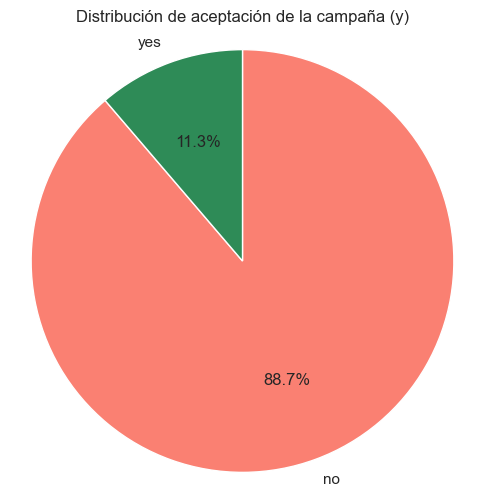

In [50]:
# Gráfica 1: Aceptación de campaña
# Conteo de valores
y_counts = bank_df['y'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    y_counts,
    labels=y_counts.index,
    autopct='%1.1f%%',
    colors=['salmon', 'seagreen'],
    startangle=90,
    counterclock=False
)
plt.title('Distribución de aceptación de la campaña (y)')
plt.axis('equal')  # Para que sea un círculo
plt.show()

Con este gráfico podemos ver que la mayoría de los clientes no aceptaron la campaña, lo que indica una baja efectividad de la misma.
Desde aquí podemos tomar varios:
1. Centrarnos en lo positivo para ver que nos ha funcionado
2. Enfocarnos en lo negativo para mejorar la efectividad de las campañas posteriores.
3. Analizar ambos caminos para obtener una visión completa y conjunta

En mi caso concreto voy a optar por el último, ya que creo que la visión conjunta nos ayudará a entender mejor el comportamiento de los clientes y a mejorar la efectividad de las campañas futuras, viendo los puntos reseñables tanto de lo que hemos hecho bien como de lo que no ha funcionado

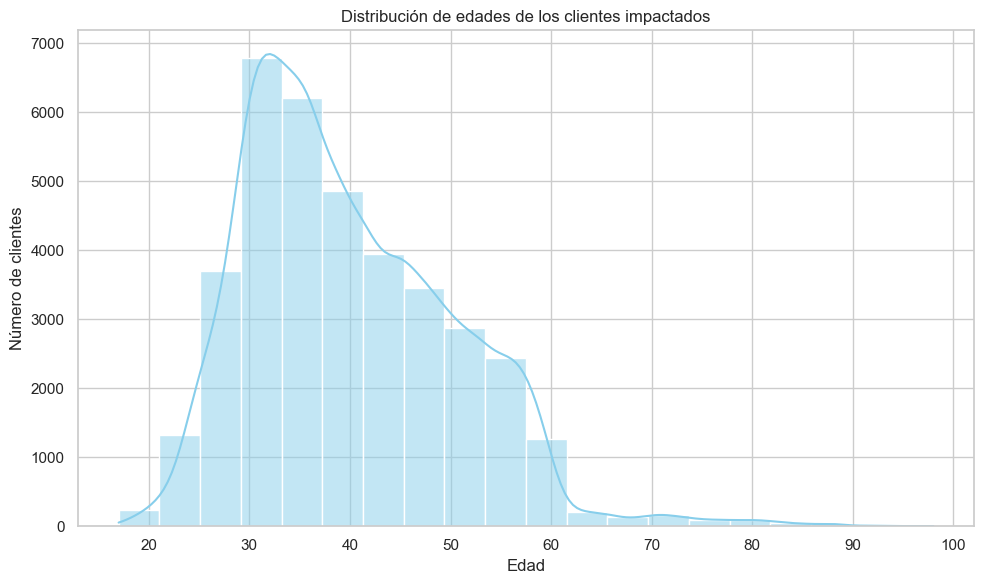

In [51]:
#Gráfico 2: Distribución por edad de los clientes impactados

#Convertimos la columna 'age' a numérica, manejando errores para evitar problemas durante el análisis
bank_df['age'] = pd.to_numeric(bank_df['age'], errors='coerce')
bank_df['y'] = bank_df['y'].astype(str)

# Gráfica 1: Distribución de edades de clientes impactados
plt.figure(figsize=(10, 6))
sns.histplot(bank_df['age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribución de edades de los clientes impactados')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()

Vemos que la mayoria de clientes se centran en el rango de edad entre 30 y 50 años, por lo que a partir de ahí analizaremos la aceptación de la campaña en base a los distintos grupos de edad.

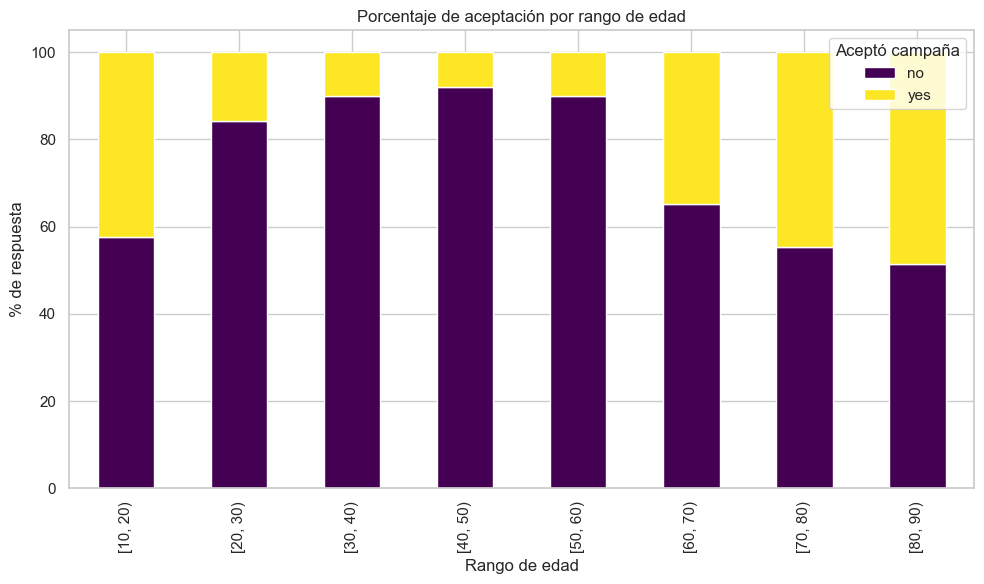

In [52]:
# Gráfica 3: Aceptación por edad (en rangos de 10 años)
bank_df['age_range'] = pd.cut(bank_df['age'], bins=range(10, 100, 10), right=False)
age_acceptance = pd.crosstab(bank_df['age_range'], bank_df['y'], normalize='index') * 100

age_acceptance.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Porcentaje de aceptación por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('% de respuesta')
plt.legend(title='Aceptó campaña')
plt.tight_layout()
plt.show()


Con este segundo gráfico vemos que a pesar de ser los más presentes en la muestra, el rango entre los 30 y los 50/60 años, han sido los que menos se han interesado en la campaña, sin embargo en el resto de grupos de edad si ha tenido más exito

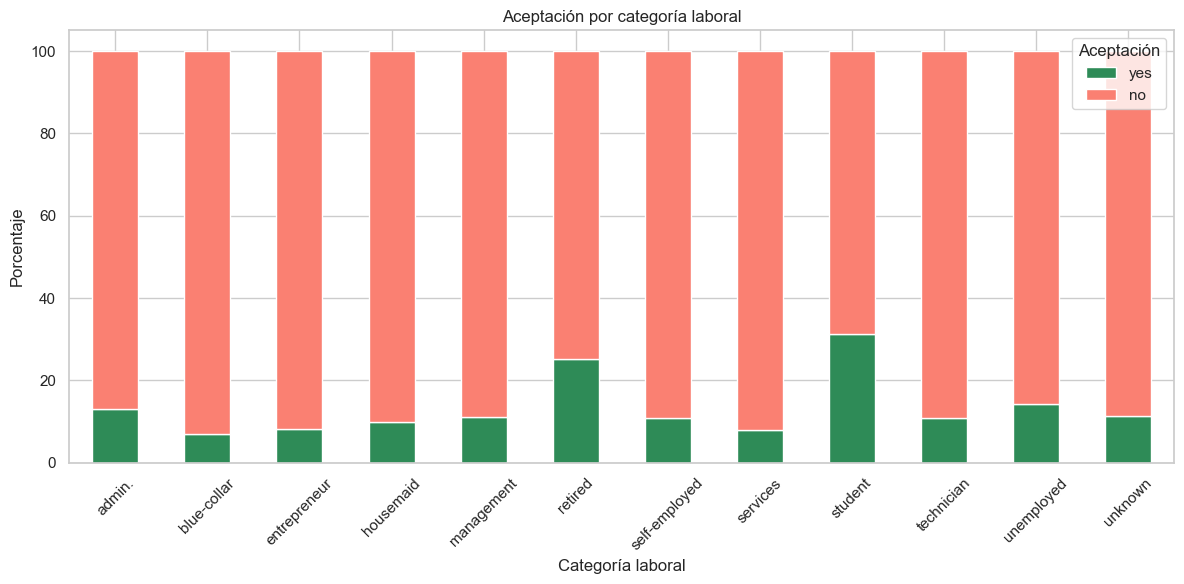

In [53]:
# Gráfica 4: Aceptación por categoría laboral
# Agrupamos y preparamos los datos
job_counts = bank_df.groupby(['job', 'y']).size().unstack(fill_value=0)
job_counts_percent = job_counts.div(job_counts.sum(axis=1), axis=0) * 100

# Gráfica
job_counts_percent[['yes', 'no']].plot(kind='bar', stacked=True, figsize=(12,6), color=['seagreen', 'salmon'])
plt.title('Aceptación por categoría laboral')
plt.ylabel('Porcentaje')
plt.xlabel('Categoría laboral')
plt.xticks(rotation=45)
plt.legend(title='Aceptación')
plt.tight_layout()
plt.show()


Otro de los puntos de vista por el que podemos analizar el exito de la campaña es por situación laboral, vemos un pico de aceptación entre los estudiantes y los jubilados (retired), lo que viene a confirmar lo visto en el gráfico anterior de la aceptación por edad

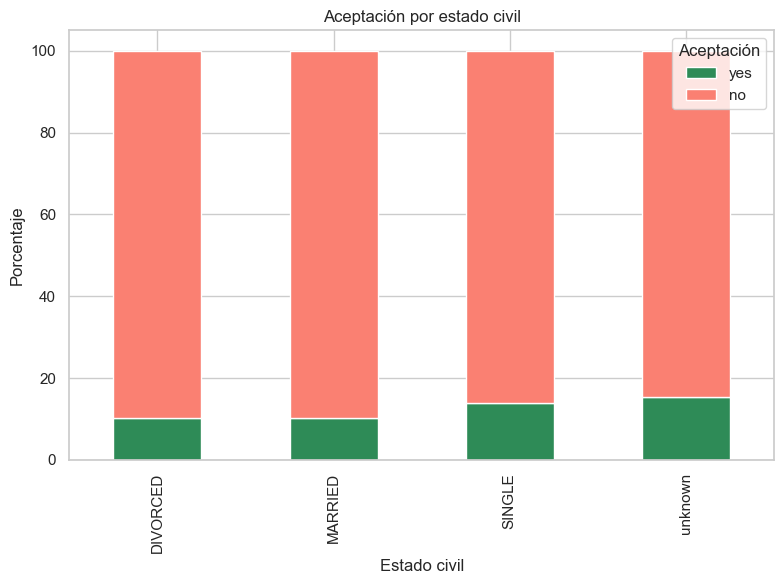

In [54]:
# Gráfica 5: Aceptación por estado civil
marital_counts = bank_df.groupby(['marital', 'y']).size().unstack(fill_value=0)
marital_counts_percent = marital_counts.div(marital_counts.sum(axis=1), axis=0) * 100

marital_counts_percent[['yes', 'no']].plot(kind='bar', stacked=True, figsize=(8,6), color=['seagreen', 'salmon'])
plt.title('Aceptación por estado civil')
plt.ylabel('Porcentaje')
plt.xlabel('Estado civil')
plt.legend(title='Aceptación')
plt.tight_layout()
plt.show()

En esta gráfica podemos observar que los clientes solteros tienen una tasa de aceptación algo más positiva respecto a los casados y divorciados, lo cual puede ser un dato relevante a pesar de no ser una diferencia muy destacada.

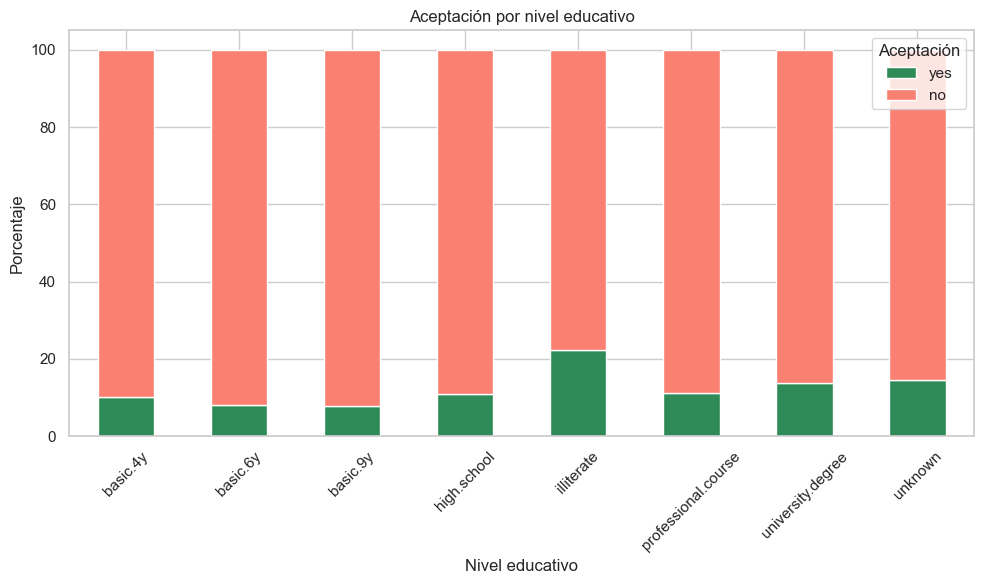

In [56]:
# Gráfica 6: Aceptación por nivel educativo
education_counts = bank_df.groupby(['education', 'y']).size().unstack(fill_value=0)
education_counts_percent = education_counts.div(education_counts.sum(axis=1), axis=0) * 100

education_counts_percent[['yes', 'no']].plot(kind='bar', stacked=True, figsize=(10,6), color=['seagreen', 'salmon'])
plt.title('Aceptación por nivel educativo')
plt.ylabel('Porcentaje')
plt.xlabel('Nivel educativo')
plt.xticks(rotation=45)
plt.legend(title='Aceptación')
plt.tight_layout()
plt.show()


En esta gráfica vemos que el nivel de aceptación de la campaña ha sido más alto (dento de la baja aceptación general) entre las personas analfabetas que para el resto

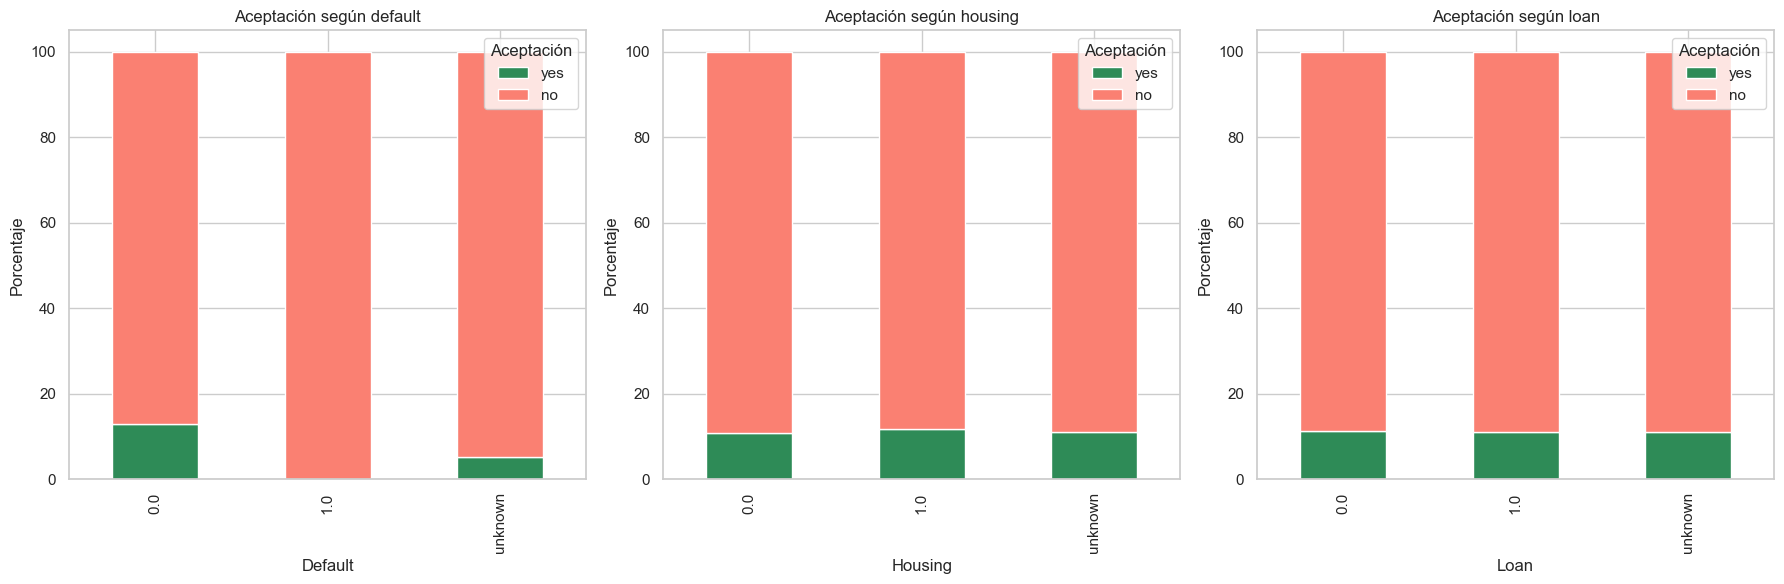

In [57]:
# Gráfica 7: Aceptación según relacion con el banco (impagos, hipoteca, préstamo)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
credit_vars = ['default', 'housing', 'loan']

for ax, col in zip(axs, credit_vars):
    credit_counts = bank_df.groupby([col, 'y']).size().unstack(fill_value=0)
    credit_percent = credit_counts.div(credit_counts.sum(axis=1), axis=0) * 100
    
    credit_percent[['yes', 'no']].plot(kind='bar', stacked=True, color=['seagreen', 'salmon'], ax=ax)
    ax.set_title(f'Aceptación según {col}')
    ax.set_ylabel('Porcentaje')
    ax.set_xlabel(col.capitalize())
    ax.legend(title='Aceptación')

plt.tight_layout()
plt.show()


De las variables economicas solo podemos sacar algo de información concluyente de los clientes que han cumplido con sus obligaciones de pago en prestamos anteriores, que si han sido algo más receptivos con la campaña, ya que el resto están repartidos de manera  más o menos equitativa.

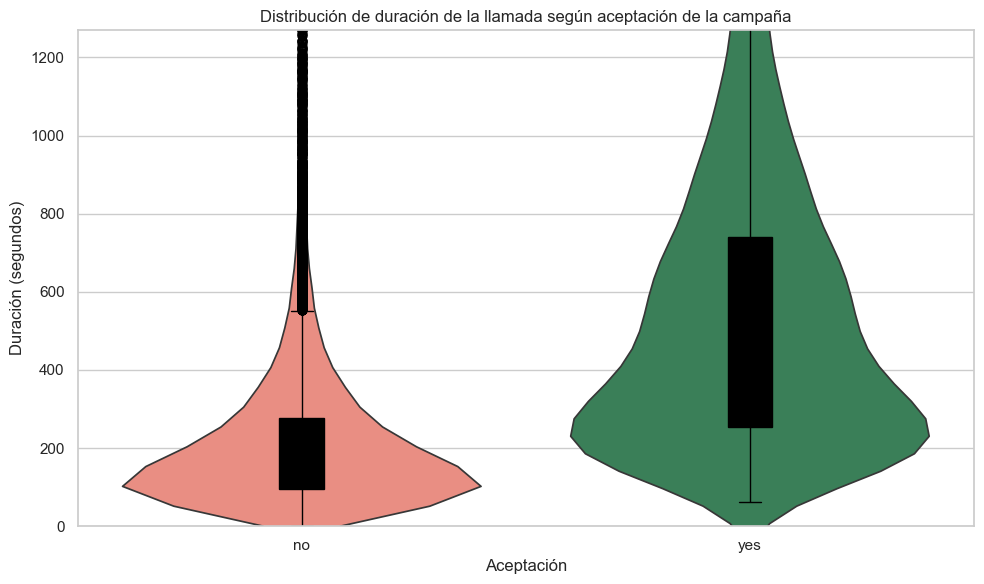

In [ ]:
# Gráfica 8: Aceptación en función de duración y veces contactado
plt.figure(figsize=(10, 6))
sns.violinplot(data=bank_df, x='y', y='duration', hue='y', inner=None, palette={'yes': 'seagreen', 'no': 'salmon'}, legend=False)
sns.boxplot(data=bank_df, x='y', y='duration', width=0.1, color='black')  # Boxplot para marcar estadísticos

plt.title('Distribución de duración de la llamada según aceptación de la campaña')
plt.ylabel('Duración (segundos)')
plt.xlabel('Aceptación')
plt.ylim(0, bank_df['duration'].quantile(0.99))  # Recorte para evitar outliers extremos
plt.tight_layout()
plt.show()


Con este gráfico vemos que las llamadas más exitosas han sido las que han durado algo más de tiempo, aunque la mayoria (tanto para si como para no), han estado por debajo de los 4 minutos

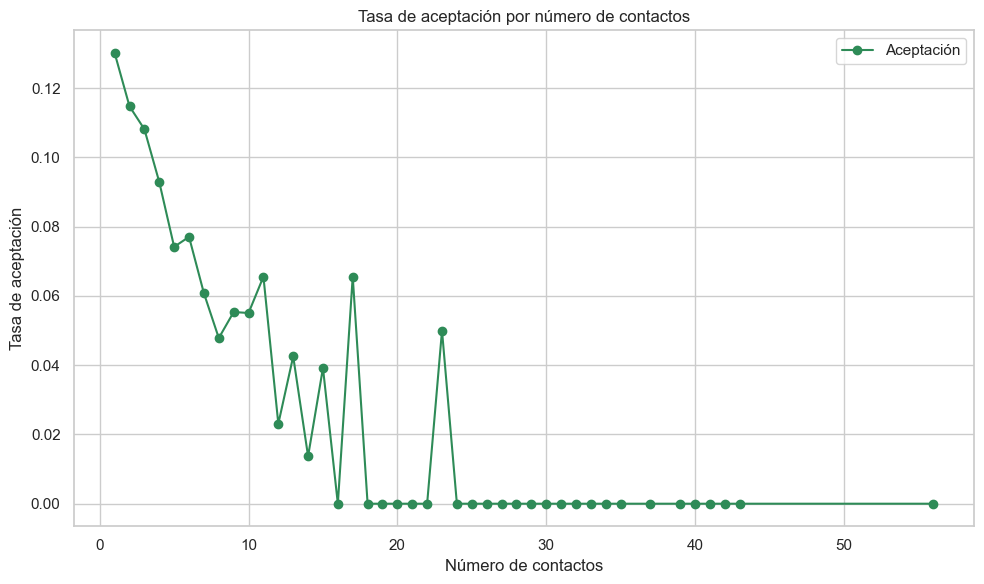

In [58]:
# Gráfica 9: Aceptación por número de contactos
campaign_acceptance = bank_df.groupby('campaign')['y'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(campaign_acceptance.index, campaign_acceptance['yes'], marker='o', color='seagreen', label='Aceptación')
plt.title('Tasa de aceptación por número de contactos')
plt.xlabel('Número de contactos')
plt.ylabel('Tasa de aceptación')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


En esta gráfica se muestra que la mayoria de clientes que han aceptado la campaña han sido con menos de 15 llamadas, y que los que mas veces han sido contactados han sido más propensos a rechazar las campañas, salvo las excepciones de 17 y 23 contactos

============

Aqui empezamos a preparar los datos para el análisis de series temporales

In [59]:
# Normalizar nombres de mes en español
meses_ordenados = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre', 'unknown'
]

# Asegurar tipo correcto
bank_df['anyo'] = bank_df['anyo'].astype(str)
bank_df['mes'] = bank_df['mes'].str.lower()

# Crear columna mes-año si aún no existe
bank_df['mes_anio'] = bank_df['mes'] + '-' + bank_df['anyo']


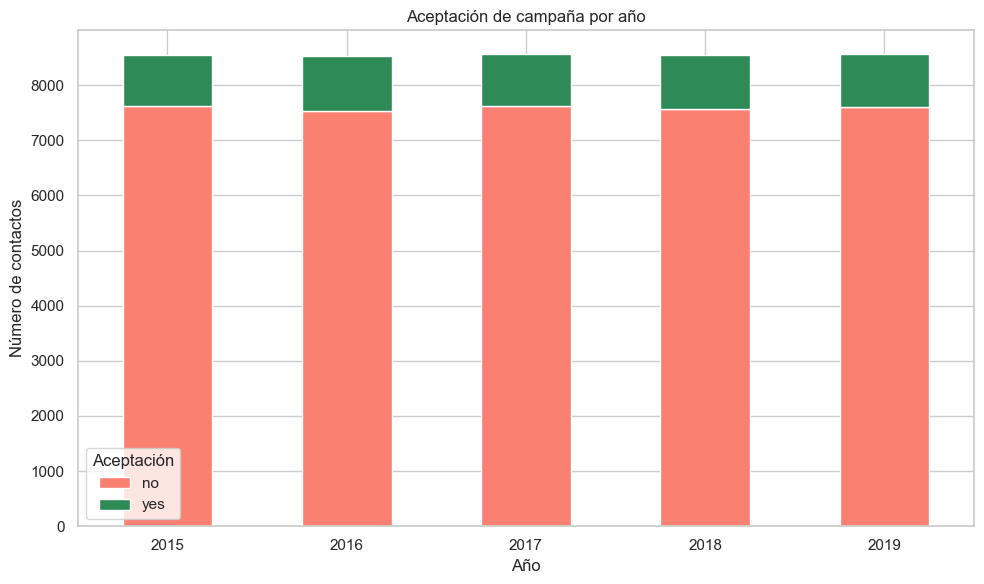

In [ ]:
# Filtrar registros válidos (obviamos los registros con 'unknown')
df_anyo = bank_df[bank_df['anyo'].str.isnumeric()]

# Conteo por año y respuesta
aceptacion_anual = df_anyo.groupby(['anyo', 'y']).size().unstack(fill_value=0)

# Gráfica 10: Aceptación de campaña por año
aceptacion_anual.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'seagreen'])
plt.title('Aceptación de campaña por año')
plt.xlabel('Año')
plt.ylabel('Número de contactos')
plt.legend(title='Aceptación')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Vemos que a pesar de que la campaña se ha realizado durante varios años, el exito (muy poco) ha sido similar en todos ellos

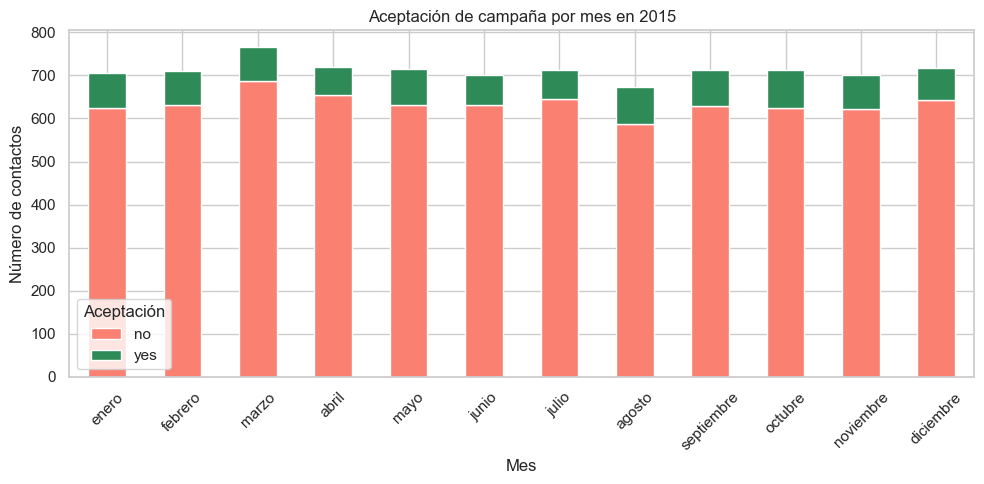

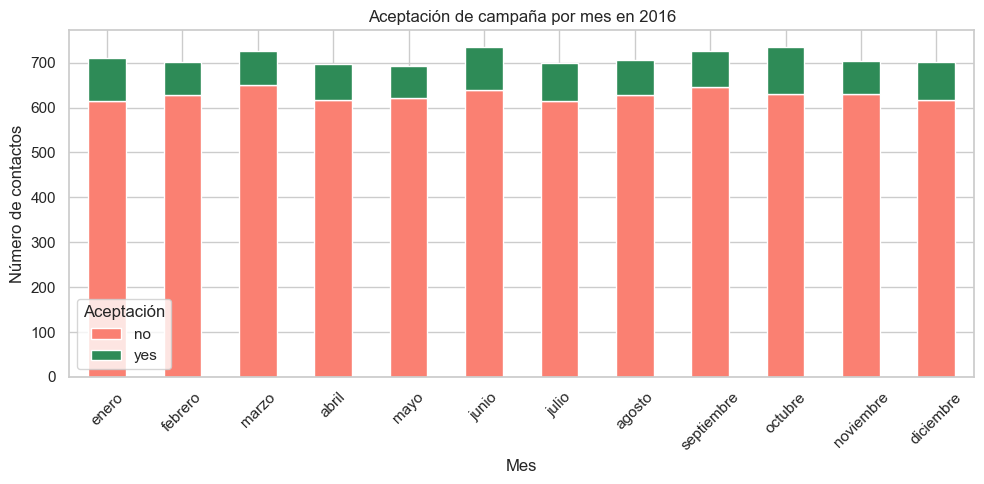

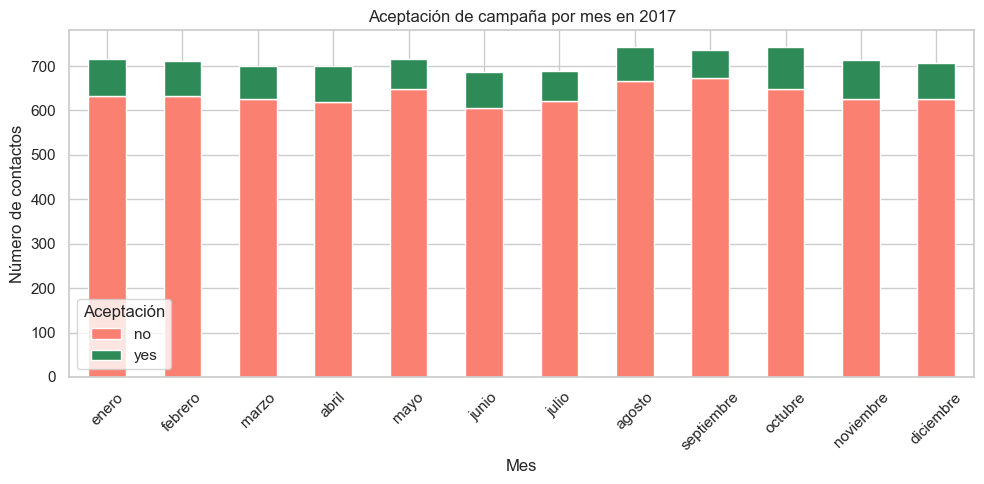

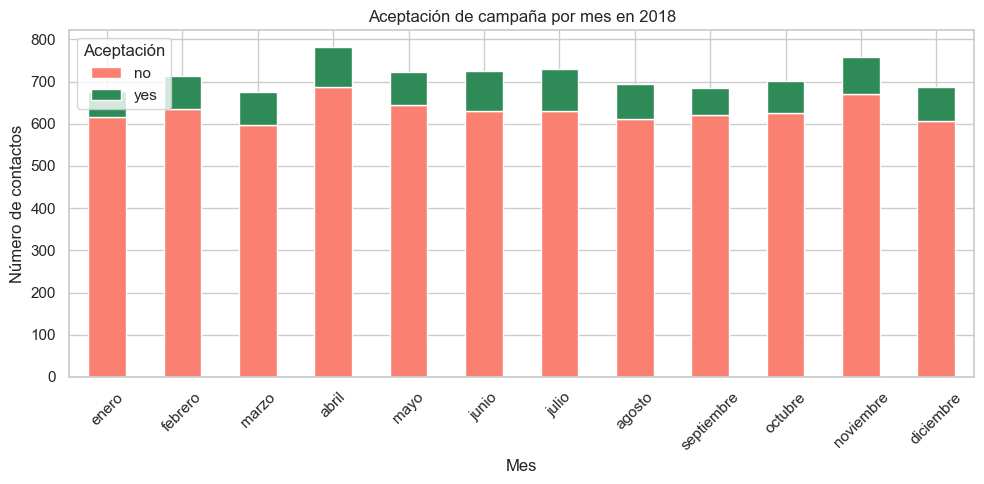

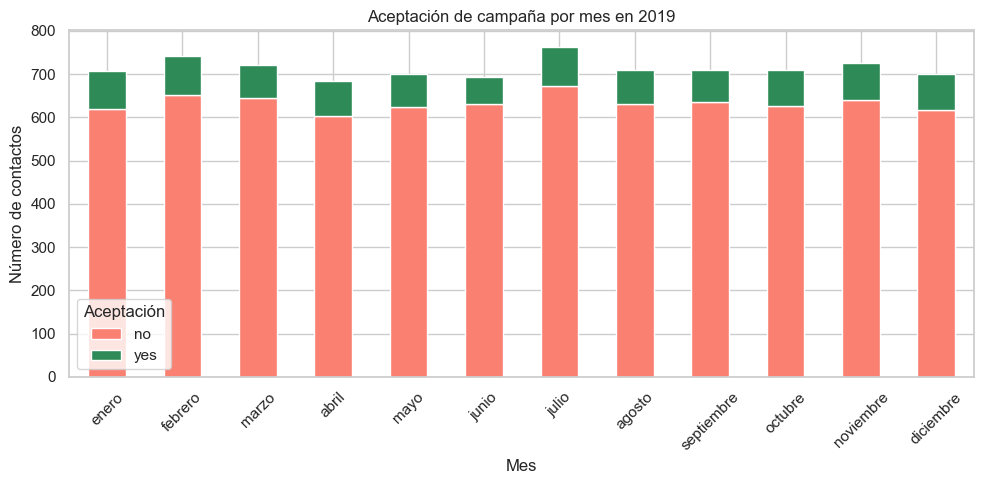

In [62]:
# Gráfica 11: Aceptación de campaña por cada mes 
# Reordenar los meses para visualización ordenada
df_mensual = df_anyo[df_anyo['mes'].isin(meses_ordenados[:-1])].copy()
df_mensual['mes'] = pd.Categorical(df_mensual['mes'], categories=meses_ordenados[:-1], ordered=True)

# Agrupamos por año, mes y aceptación
for anio in sorted(df_mensual['anyo'].unique()):
    df_temp = df_mensual[df_mensual['anyo'] == anio]
    
    mensual = df_temp.groupby(['mes', 'y'], observed=True).size().unstack(fill_value=0)
    
    mensual = mensual.reindex(meses_ordenados[:-1])  # Asegura orden de meses
    
    mensual.plot(kind='bar', stacked=True, figsize=(10, 5), color=['salmon', 'seagreen'])
    plt.title(f'Aceptación de campaña por mes en {anio}')
    plt.xlabel('Mes')
    plt.ylabel('Número de contactos')
    plt.legend(title='Aceptación')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Al igual que en la gráfica por años, vemos que la aceptación (casi nula) de la campaña tambien se ha mantenido constante en todos los meses de todos los años

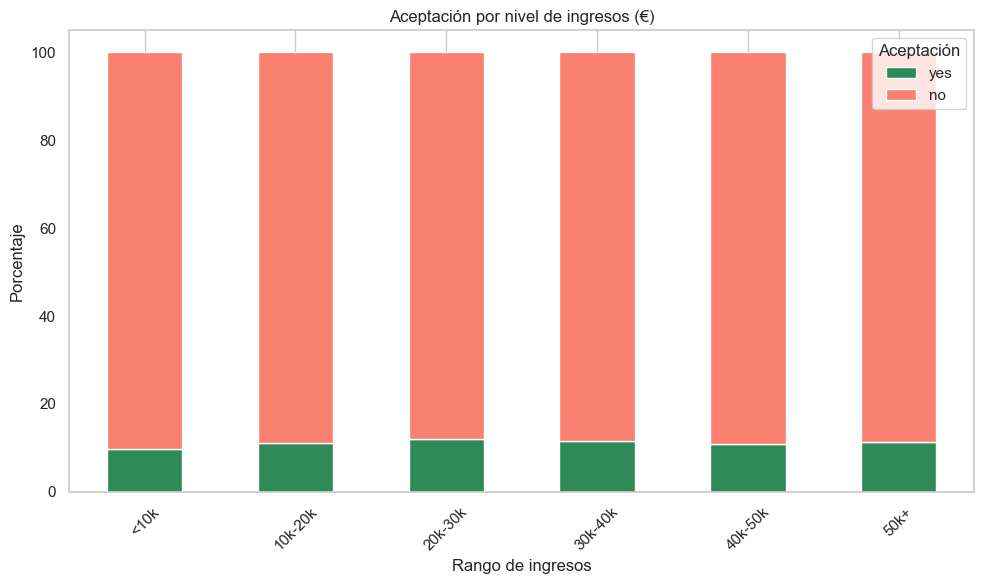

In [64]:
#Gráfica 12: Aceptación por nivel de ingresos
# Crear rangos de ingresos
customer_df['income_range'] = pd.cut(customer_df['Income'],
                                     bins=[0, 10000, 20000, 30000, 40000, 50000, float('inf')],
                                     labels=['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+'])

# Merge con banco
merged_df = pd.merge(bank_df, customer_df, left_on="id_", right_on="ID", how="inner")

# Agrupar y calcular proporciones
income_acceptance = merged_df.groupby(['income_range', 'y'], observed=True).size().unstack(fill_value=0)
income_acceptance_percent = income_acceptance.div(income_acceptance.sum(axis=1), axis=0) * 100

# Graficar
income_acceptance_percent[['yes', 'no']].plot(kind='bar', stacked=True, color=['seagreen', 'salmon'], figsize=(10,6))
plt.title('Aceptación por nivel de ingresos (€)')
plt.ylabel('Porcentaje')
plt.xlabel('Rango de ingresos')
plt.xticks(rotation=45)
plt.legend(title='Aceptación')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



En la gráfica por nivel de ingresos, se observa que no es determinante en el exito de la campaña o no

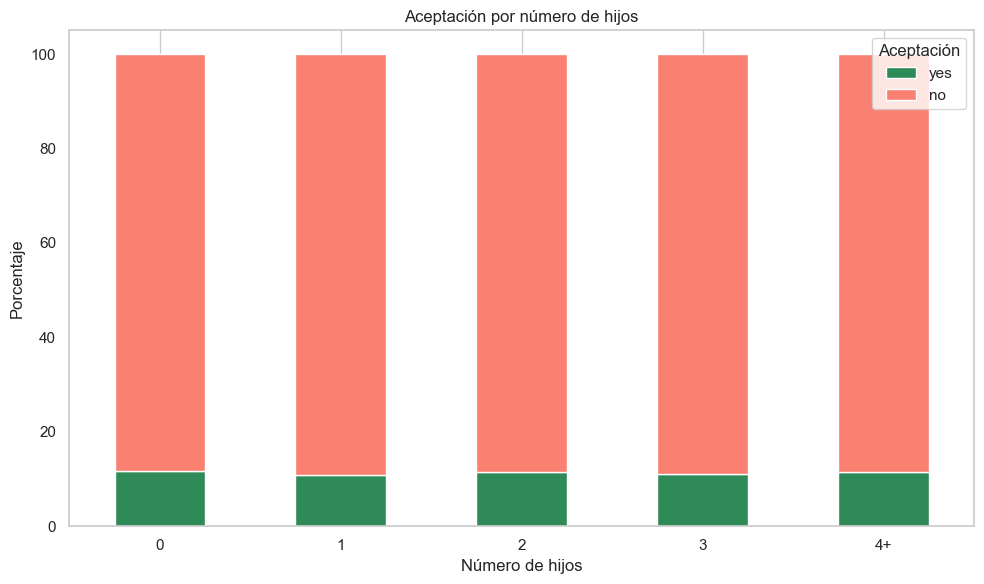

In [66]:
# Gráfica 13: Aceptación por número de hijos
# Sumamos hijos (kidhome y teenhome) para crear una nueva columna
merged_df['total_children'] = merged_df['Kidhome'] + merged_df['Teenhome']

# Agrupar por categoría
merged_df['children_category'] = pd.cut(merged_df['total_children'],
                                        bins=[-1, 0, 1, 2, 3, float('inf')],
                                        labels=['0', '1', '2', '3', '4+'])

# Agrupar y graficar
children_acceptance = merged_df.groupby(['children_category', 'y'], observed=True).size().unstack(fill_value=0)
children_acceptance_percent = children_acceptance.div(children_acceptance.sum(axis=1), axis=0) * 100

children_acceptance_percent[['yes', 'no']].plot(kind='bar', stacked=True, color=['seagreen', 'salmon'], figsize=(10,6))
plt.title('Aceptación por número de hijos')
plt.ylabel('Porcentaje')
plt.xlabel('Número de hijos')
plt.xticks(rotation=0)
plt.legend(title='Aceptación')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Observamos que el numero de hijos tampoco es un factor relevante a la hora de la aceptación de la campaña

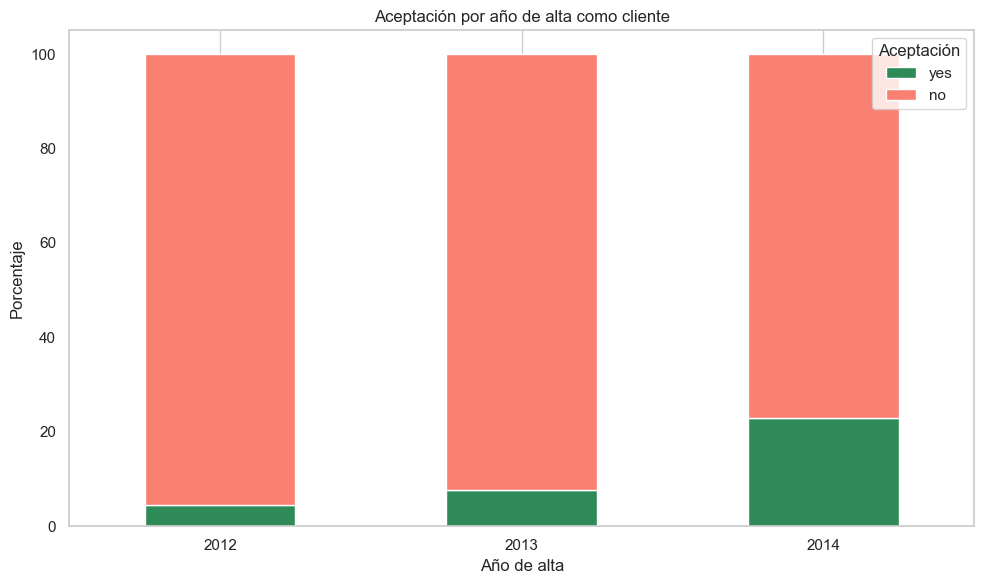

In [67]:
# Gráfica 14: Aceptación por antiguedad como cliente
# Convertir fechas
merged_df['Dt_Customer'] = pd.to_datetime(merged_df['Dt_Customer'], errors='coerce')
merged_df['year_joined'] = merged_df['Dt_Customer'].dt.year

# Agrupar y graficar
join_acceptance = merged_df.groupby(['year_joined', 'y']).size().unstack(fill_value=0)
join_acceptance_percent = join_acceptance.div(join_acceptance.sum(axis=1), axis=0) * 100

join_acceptance_percent[['yes', 'no']].plot(kind='bar', stacked=True, color=['seagreen', 'salmon'], figsize=(10,6))
plt.title('Aceptación por año de alta como cliente')
plt.ylabel('Porcentaje')
plt.xlabel('Año de alta')
plt.xticks(rotation=0)
plt.legend(title='Aceptación')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Parece que cuanta menos antiguedad se tiene como cliente del banco mayor es la aceptación de esta campaña

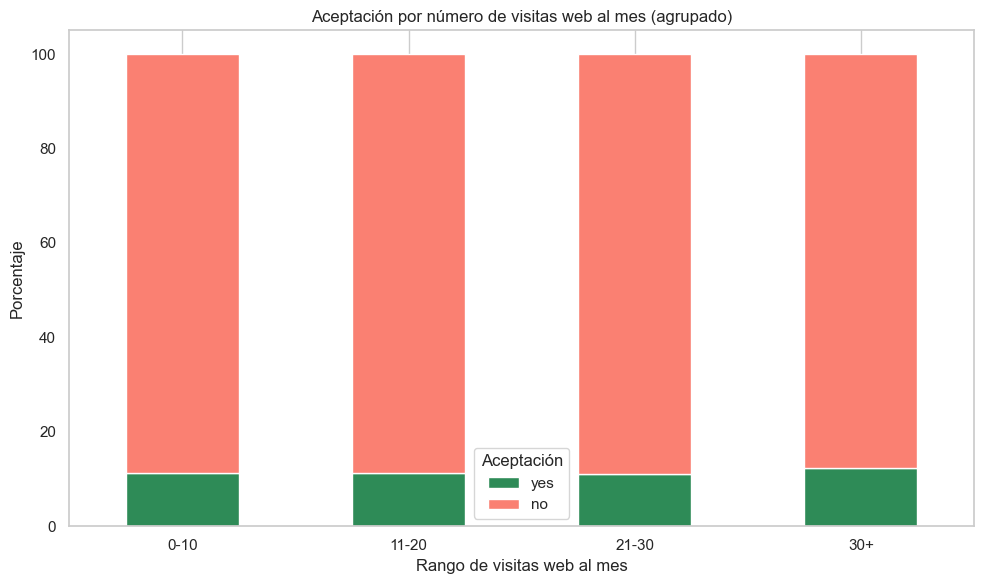

In [69]:
# Gráfica 15: Aceptación por número de visitas web al mes
# Crear rangos personalizados de visitas web
bins = [0, 10, 20, 30, float('inf')]
labels = ['0-10', '11-20', '21-30', '30+']

merged_df['visits_range'] = pd.cut(merged_df['NumWebVisitsMonth'], bins=bins, labels=labels, right=True, include_lowest=True)

# Agrupar y calcular proporciones
visit_acceptance = merged_df.groupby(['visits_range', 'y'], observed=True).size().unstack(fill_value=0)
visit_acceptance_percent = visit_acceptance.div(visit_acceptance.sum(axis=1), axis=0) * 100

# Graficar en formato stacked bar
visit_acceptance_percent[['yes', 'no']].plot(kind='bar', stacked=True, color=['seagreen', 'salmon'], figsize=(10,6))
plt.title('Aceptación por número de visitas web al mes (agrupado)')
plt.ylabel('Porcentaje')
plt.xlabel('Rango de visitas web al mes')
plt.xticks(rotation=0)
plt.legend(title='Aceptación')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Con esta gráfica vemos que la actividad online (visitas a la web del banco) de los clientes no influye demasiado en si aceptaron la campaña o no